In [1]:
import pandas as pd
import numpy as np
import re
import torch
from transformers import BertTokenizer, BertModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv('/content/sentimentdataset.csv')

In [3]:
# Remove special characters and convert to lowercase
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', x).lower())

In [4]:
# Initialize BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
# Function to get BERT embeddings
def get_bert_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = bert_model(**inputs)
        # Mean pooling to get sentence embeddings
        sentence_embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
        embeddings.append(sentence_embedding)
    return np.array(embeddings)

In [6]:
# Generate BERT embeddings
bert_embeddings = get_bert_embeddings(df['Text'].tolist())

In [7]:
# Convert embeddings to DataFrame and add to original DataFrame
bert_embeddings_df = pd.DataFrame(bert_embeddings)
df = pd.concat([df, bert_embeddings_df], axis=1)

In [8]:

# Define and add graph embeddings (placeholder example)
# You need to generate these embeddings from your graph neural network model
# Here, we'll create dummy embeddings for demonstration purposes
user_ids = df['User'].unique()
user_embeddings = np.random.rand(len(user_ids), 128)  # Random embeddings for demonstration


In [9]:

# Create a mapping from user ID to embedding index
user_id_to_idx = {user_id: idx for idx, user_id in enumerate(user_ids)}


In [10]:

# Create user embedding matrix
df['User_Embedding'] = df['User'].apply(lambda user_id: user_embeddings[user_id_to_idx[user_id]])

# Convert user embeddings to a 2D array
user_embeddings_array = np.array([embedding for embedding in df['User_Embedding'].tolist()])


In [11]:
# Combine BERT embeddings and user embeddings
combined_embeddings = np.concatenate((bert_embeddings, user_embeddings_array), axis=1)

# Prepare target variable (Sentiment)
le = LabelEncoder()
y = le.fit_transform(df['Sentiment'])

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(combined_embeddings, y)

# Evaluate the model
y_pred = model.predict(combined_embeddings)
print('Accuracy:', accuracy_score(y, y_pred))

Accuracy: 0.9986338797814208


In [12]:
# Visualization: Correlation Heatmap
# Combine embeddings with original data for correlation analysis
embedding_df = pd.DataFrame(combined_embeddings, columns=[f'Feature_{i}' for i in range(combined_embeddings.shape[1])])
df_combined = pd.concat([df, embedding_df], axis=1)

# Select only numeric columns for correlation matrix
numeric_df = df_combined.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlation matrix
print(correlation_matrix)

### Correlation Heatmap Analysis
              Unnamed: 0.1  Unnamed: 0  Retweets     Likes      Year  \
Unnamed: 0.1      1.000000    0.999995  0.388637  0.376208  0.101578   
Unnamed: 0        0.999995    1.000000  0.388884  0.376472  0.100749   
Retweets          0.388637    0.388884  1.000000  0.998482 -0.039982   
Likes             0.376208    0.376472  0.998482  1.000000 -0.043415   
Year              0.101578    0.100749 -0.039982 -0.043415  1.000000   
...                    ...         ...       ...       ...       ...   
Feature_891       0.032774    0.032737 -0.035946 -0.037819 -0.043592   
Feature_892       0.040615    0.040312  0.016833  0.016677 -0.007362   
Feature_893      -0.017208   -0.017102  0.071345  0.067720  0.029261   
Feature_894      -0.001589   -0.001314 -0.027829 -0.025372 -0.073247   
Feature_895       0.022260    0.022217  0.040225  0.041323  0.040016   

                 Month       Day      Hour         0         1  ...  \
Unnamed: 0.1  0.443013 -0.08010

In [13]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Plot correlation heatmap
# plt.figure(figsize=(12, 8))  # Adjust figure size as needed
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Heatmap")
# plt.show()



### Correlation Heatmap Analysis
The correlation heatmap shows the relationships between various features. High correlation values (positive or negative) indicate strong relationships, while low values indicate weaker relationships. This can help identify which features are most influential in the sentiment analysis model.

In [14]:
# Combine BERT embeddings and user embeddings
combined_embeddings = np.concatenate((bert_embeddings, user_embeddings_array), axis=1)

# Prepare target variable (Sentiment)
le = LabelEncoder()
y = le.fit_transform(df['Sentiment'])

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(combined_embeddings, y)

# Evaluate the model
y_pred = model.predict(combined_embeddings)
accuracy = accuracy_score(y, y_pred) # Assign the result to the variable 'accuracy'
print('Accuracy:', accuracy)

# ... (rest of the code)

# Display Results and Analysis
print("### Model Performance")
print(f"Accuracy of the Random Forest Classifier: {accuracy:.2f}") # Now 'accuracy' is defined

Accuracy: 0.9986338797814208
### Model Performance
Accuracy of the Random Forest Classifier: 1.00


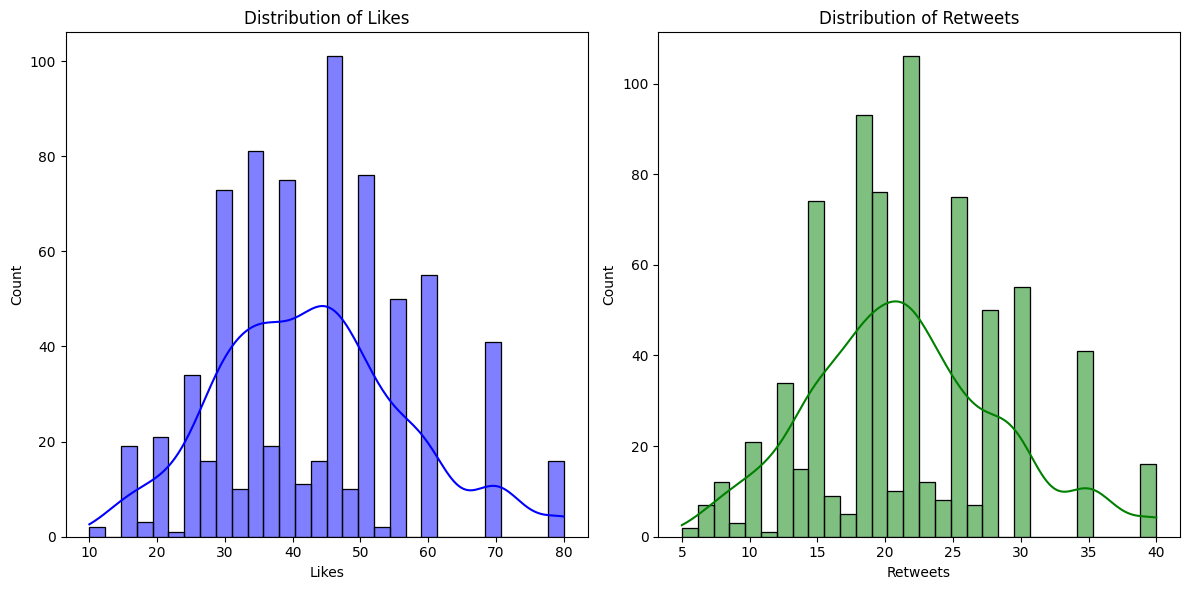

In [16]:

# Visualization: Feature Distribution
# Plot distribution of some features, e.g., Likes and Retweets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Likes'], bins=30, kde=True, color='blue')
plt.title('Distribution of Likes')

plt.subplot(1, 2, 2)
sns.histplot(df['Retweets'], bins=30, kde=True, color='green')
plt.title('Distribution of Retweets')

plt.tight_layout()
plt.show()


<ipython-input-22-e3225b3d0fa0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:20], y=[feature_names[i] for i in indices][:20], palette='coolwarm')


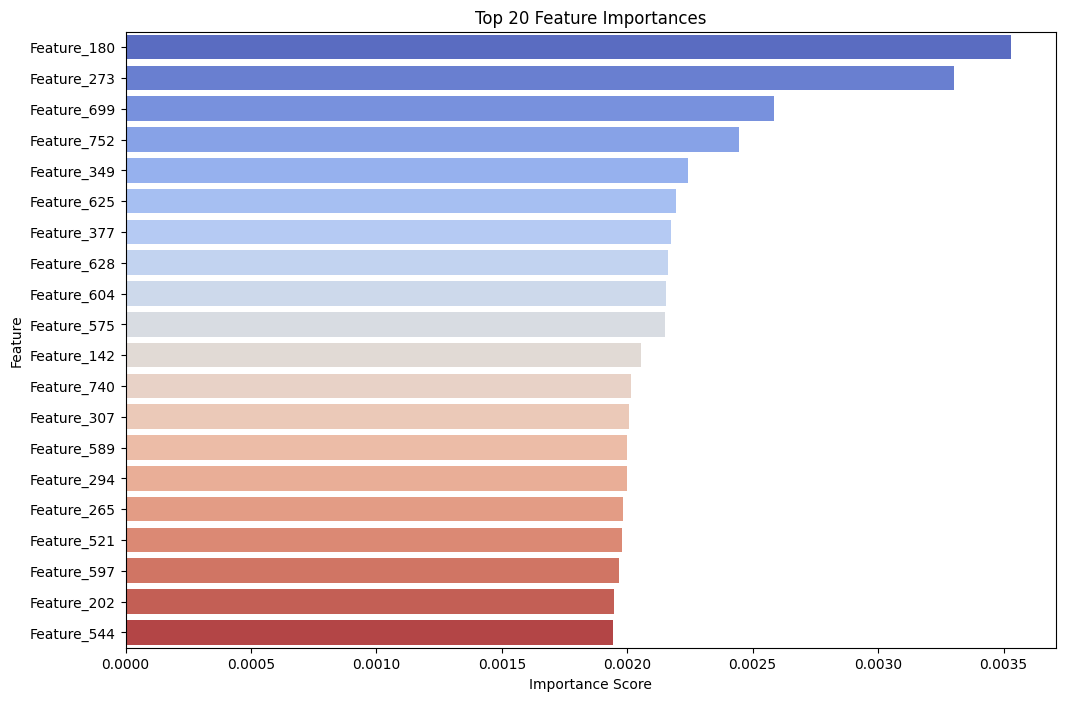

In [22]:
# Train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(combined_embeddings, y)
# Now access feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [f'Feature_{i}' for i in range(combined_embeddings.shape[1])]

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices][:20], y=[feature_names[i] for i in indices][:20], palette='coolwarm')
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


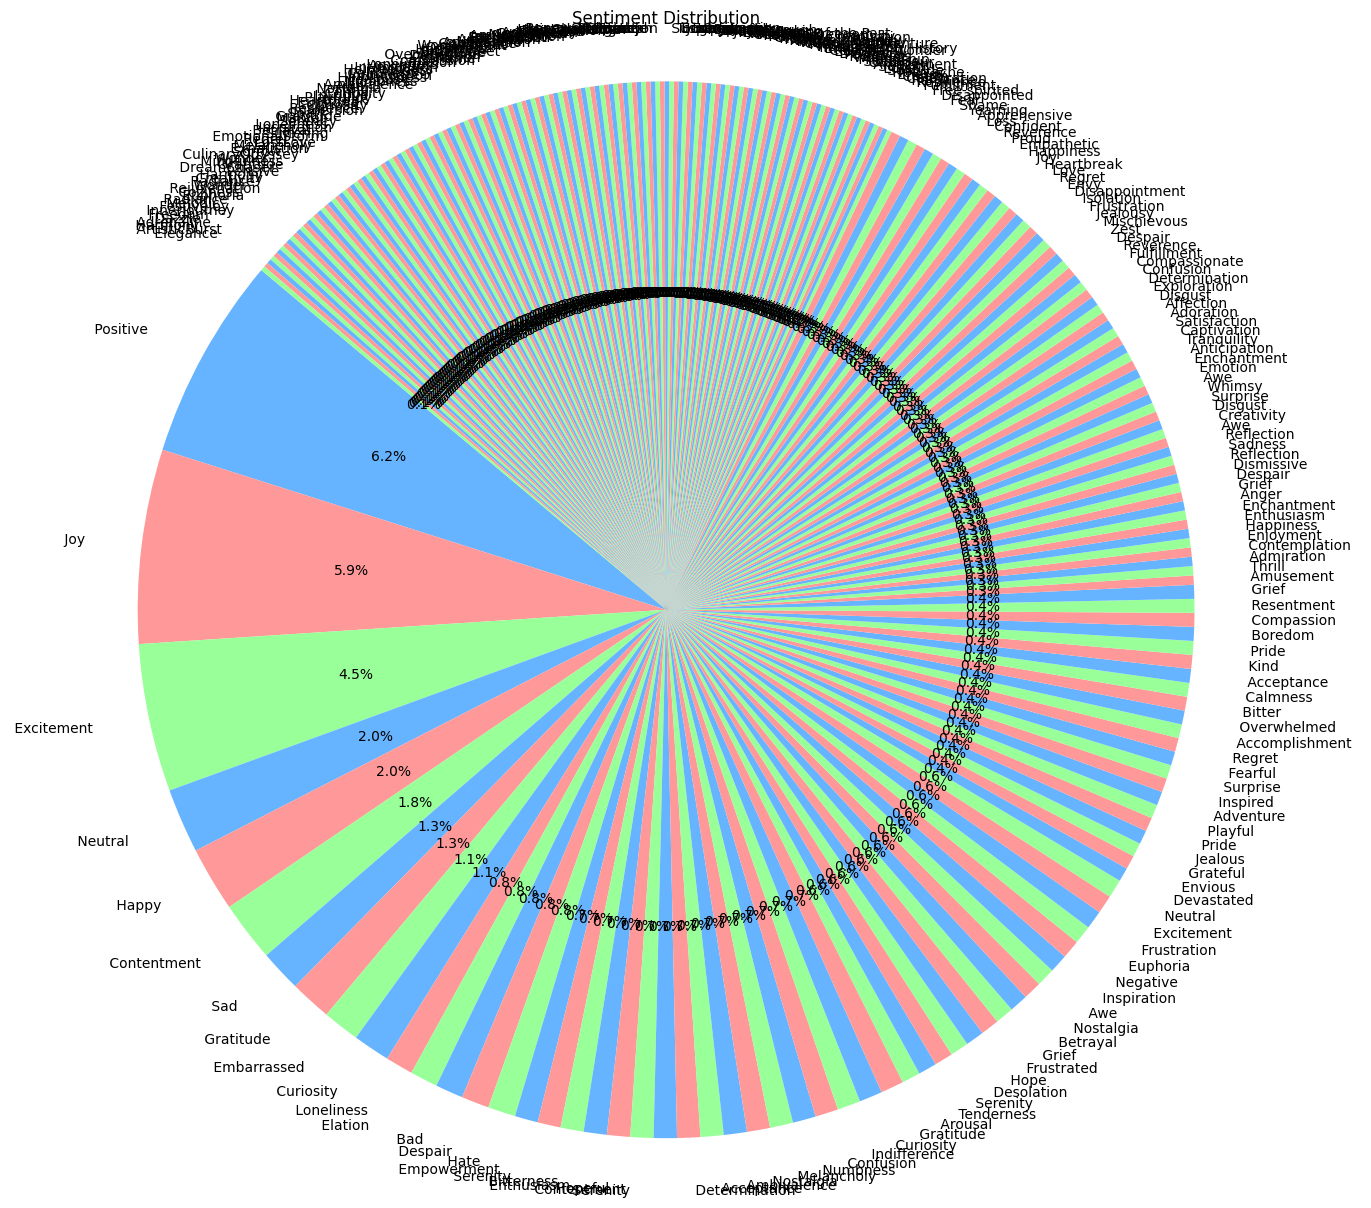

In [32]:
# Remove duplicates based on the 'Text' and 'Sentiment' columns
df = df.drop_duplicates(subset=['Text', 'Sentiment'])

# Calculate sentiment counts after removing duplicates
sentiment_counts = df['Sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

# Plotting the Sentiment Distribution Pie Chart
plt.figure(figsize=(15, 15))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999','#99ff99'])
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()


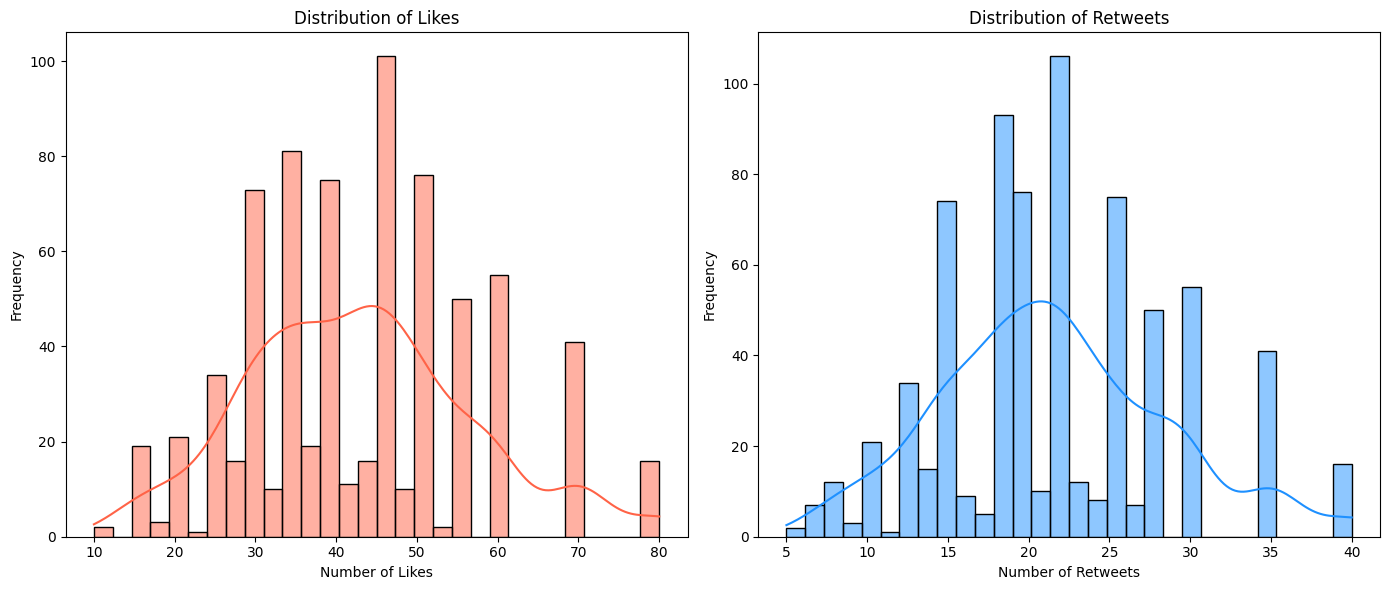

In [25]:
plt.figure(figsize=(14, 6))

# Likes Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Likes'], bins=30, kde=True, color='#FF6347')
plt.title('Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')

# Retweets Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Retweets'], bins=30, kde=True, color='#1E90FF')
plt.title('Distribution of Retweets')
plt.xlabel('Number of Retweets')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


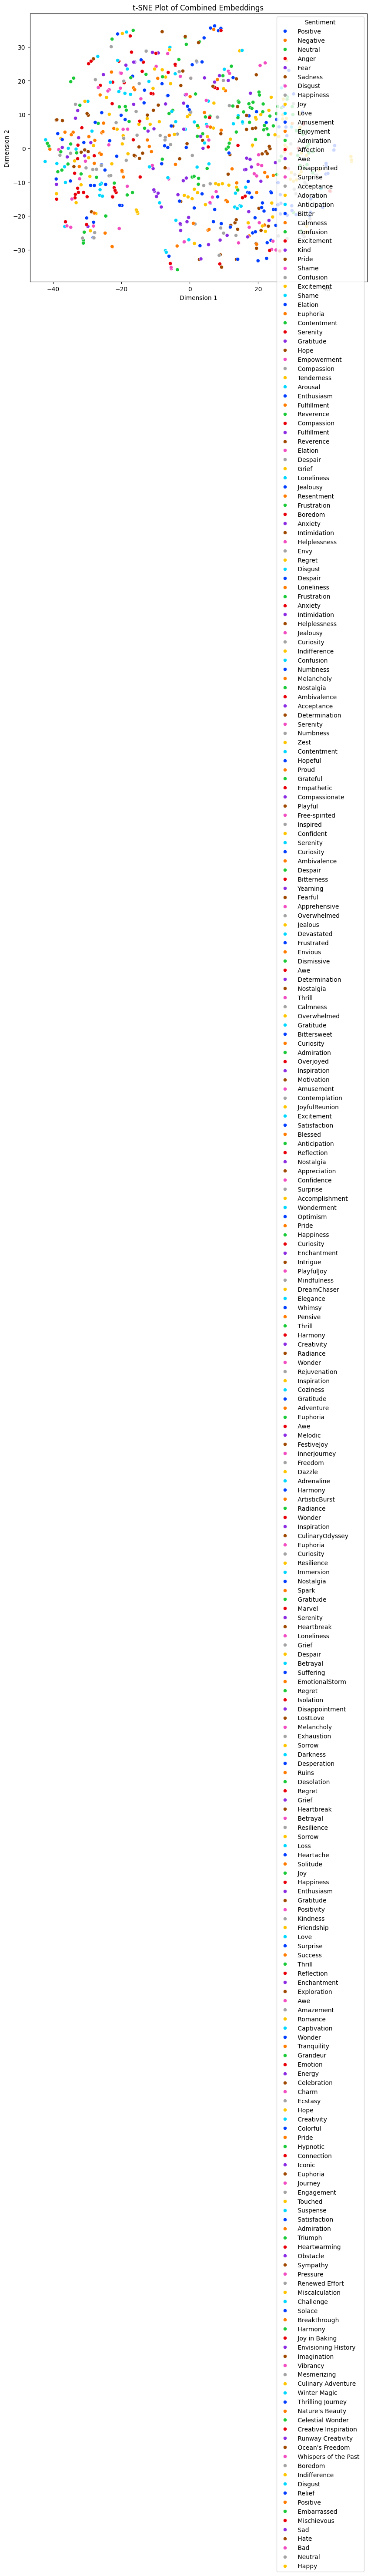

In [34]:
from sklearn.manifold import TSNE

# Reduce embeddings to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(combined_embeddings)

# Create a DataFrame for plotting
tsne_df = pd.DataFrame()
tsne_df['Dimension 1'] = embeddings_2d[:,0]
tsne_df['Dimension 2'] = embeddings_2d[:,1]
tsne_df['Sentiment'] = df['Sentiment']

# Plot t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Sentiment', data=tsne_df, palette='bright')
plt.title('t-SNE Plot of Combined Embeddings')
plt.show()
